In [69]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from math import sqrt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split


from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.svm import SVC

from sklearn.decomposition import PCA

import seaborn as sns

In [70]:
rawData = pd.read_csv(r"C:\Users/Tony/Desktop/Big Data/05/01/default of credit card clients.csv",header =1)

In [71]:
rawData.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [72]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [73]:
#dependent variable, amount paid in April, 2005.
depVar = rawData['PAY_AMT6']

In [74]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [75]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [76]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  


In [77]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# Implement Cross Validation 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [80]:
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [81]:
#cross validate
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
model = LinearRegression(n_jobs=10)

In [84]:
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [85]:
modelRF.fit(X_train,y_train)
modelSVR.fit(X_train,y_train)
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
print(cross_val_score(modelRF, X_train, y_train)) 

[-0.01166054  0.0138369  -1.17091974  0.13615181  0.02205949]


In [87]:
#Random Forest Regression Model Fitting and Scoring
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[ 0.02657262  0.01318895 -0.56995393  0.11978736  0.02011292]


0.8622616900081572

In [88]:
#Support Vector Regression Model Fitting and Scoring
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.08416847 -0.041767   -0.05417835 -0.01652764 -0.01957396]


-0.022557619126616357

In [89]:
# Linear Regression Model Fitting and Scoring
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[-1.7850728   0.3615429  -4.02031248 -0.79578046  0.74977822]


0.6721508811463882

In [90]:
predictions = modelRF.predict(X_test)

In [91]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [92]:
predRsquared = r2_score(y_test,predictions)

In [93]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squar b  , n,,  , , , ,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   , ed: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squar b  , n,,  , , , ,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

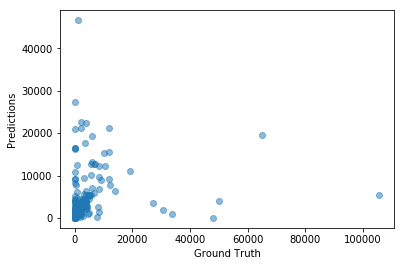

In [94]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [96]:
X_std = StandardScaler().fit_transform(rawData)


In [97]:
mean_vec = np.mean(X_std, axis=0)

In [98]:
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

In [99]:
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00003333e+00  2.61800304e-02  1.84981108e-02  3.91780407e-02
  -2.90803947e-02  1.86783571e-02 -3.05759515e-02 -1.12152421e-02
  -1.84941702e-02 -2.73498095e-03 -2.21999719e-02 -2.02708098e-02
   1.93893202e-02  1.79824969e-02  2.43548618e-02  4.03519480e-02
   1.67058600e-02  1.67301760e-02  9.74276822e-03  8.40640055e-03
   3.91518406e-02  7.79338951e-03  6.52209519e-04  2.99988072e-03
  -1.39524199e-02]
 [ 2.61800304e-02  1.00003333e+00  2.47560603e-02 -2.19168004e-01
  -1.08143015e-01  1.44717621e-01 -2.71223373e-01 -2.96391981e-01
  -2.86132492e-01 -2.67468925e-01 -2.49419709e-01 -2.35203240e-01
   2.85439380e-01  2.78323641e-01  2.83245225e-01  2.93997424e-01
   2.95572190e-01  2.90398631e-01  1.95242423e-01  1.78413901e-01
   2.10173754e-01  2.03249185e-01  2.17209673e-01  2.19602689e-01
  -1.53524994e-01]
 [ 1.84981108e-02  2.47560603e-02  1.00003333e+00  1.42324106e-02
  -3.13898864e-02 -9.08766757e-02 -5.76448004e-02 -7.07733623e-02
  -6.60982597e-02 -

In [100]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [101]:
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 6.13621364e-03 -2.27945096e-02  5.95903310e-02  5.26611590e-02
  -9.20626462e-03 -2.49858219e-03 -4.41304818e-03 -1.45845429e-02
  -1.54838157e-02  1.02502821e-02 -7.74204808e-03 -2.23753414e-04
  -2.99821251e-02  3.23917734e-02 -5.00304673e-01  6.28946330e-03
   8.81722926e-03  9.78681157e-03 -1.21189466e-01 -7.07215511e-01
   4.48157967e-01 -1.09822905e-01 -9.47422878e-02 -3.23510860e-02
  -4.64173130e-02]
 [ 6.56689948e-02 -3.11519817e-01 -9.79406397e-03  7.60170256e-02
   7.94131252e-04  2.79498082e-03 -1.43275013e-02  1.00923162e-02
   7.32284891e-03  5.82820835e-03 -4.35150161e-02  2.31486570e-02
  -1.77130693e-02 -7.52501950e-01  1.86409597e-01  3.51099366e-01
  -1.24930771e-01 -1.54221357e-02  8.83515057e-03  5.91891846e-02
   2.59971552e-01 -2.76207111e-01  1.36830500e-02 -2.68901197e-02
  -3.36275277e-02]
 [-2.20334094e-02 -3.09597152e-02 -2.68892237e-02 -7.62788197e-02
   9.48859598e-04  8.88460841e-04  7.96968009e-04 -1.63742089e-03
  -1.67295762e-03 -4.002

In [102]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [103]:
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
6.552091361456916
4.203322797623353
1.554996992663524
1.4767498617833208
0.02521397077354633
0.023212714639919082
0.040756497547552326
0.06995407547803055
0.13157693808689663
0.1885951171838501
0.25959202934223524
0.24881121858277627
0.3972507448284409
0.5238985749837713
1.061008330539487
0.5695242528580665
0.6279298371832022
0.7322928573157529
0.7797126210432016
0.9856322410608424
0.9702270987201955
0.915019744688376
0.9062957404917414
0.871148855924926
0.886018886312096


In [104]:
pca = PCA(n_components=10)
pca.fit_transform(rawData)


array([[-1.66511134e+05, -7.55488962e+04, -5.02028232e+02, ...,
         3.50353577e+02,  1.51028223e+02,  1.57887222e+03],
       [-1.14249888e+05,  9.76979163e+03,  2.70506782e+03, ...,
         1.53783091e+03, -6.64852465e+02,  1.35794598e+03],
       [-9.84553390e+04, -3.34822916e+04, -2.70788886e+03, ...,
         1.89149001e+03, -2.32246625e+03,  5.44455765e+03],
       ...,
       [-1.40182979e+05, -7.78460272e+04,  2.62735666e+04, ...,
        -4.84347165e+03,  1.30931719e+03, -4.51244438e+03],
       [-4.14047050e+04, -7.48970529e+04,  1.77529009e+04, ...,
        -4.97656502e+04, -1.08368134e+04, -1.72282492e+04],
       [-7.08372684e+04, -9.55028300e+04, -1.40871443e+04, ...,
         4.01321992e+03,  1.82199707e+03, -6.83090750e+03]])

In [105]:
print( pca.explained_variance_ratio_)

[0.60943217 0.2948671  0.03047399 0.01690108 0.00940589 0.00903062
 0.00753289 0.0063759  0.00582749 0.0029664 ]


In [106]:
#Explained variance
pca = PCA().fit(X_std)

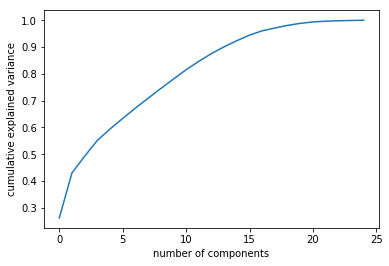

In [107]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [108]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(rawData)
pca = PCA()
pca.fit(segmentation_std)
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None, svd_solver='auto', tol=0.0, whiten=False )



PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [109]:
pca.transform(segmentation_std)


array([[-1.81178577e+00, -1.30879539e+00, -4.81495994e-01, ...,
         7.89958294e-03, -6.28323496e-04,  1.48248879e-02],
       [-6.82513487e-01, -2.44501667e+00,  1.14175108e+00, ...,
        -4.39209769e-03, -1.40333534e-02,  1.10994819e-02],
       [-8.69346490e-01, -1.00875097e+00,  5.76909908e-01, ...,
        -8.59546632e-02, -5.71109390e-02, -5.16919018e-02],
       ...,
       [ 4.75859356e-01, -3.56976557e+00,  3.84488816e-01, ...,
         2.38622445e-02,  4.96290416e-03, -2.56820350e-02],
       [ 7.29528737e-01,  4.22949400e-01,  1.67188999e-01, ...,
         1.84546080e-01, -1.28327116e-01, -1.17513676e-02],
       [-5.21101585e-02, -1.09593737e+00, -1.56104557e+00, ...,
        -1.47006488e-02,  1.29426362e-01, -5.40862657e-02]])

In [110]:
scores_pca = pca.transform(segmentation_std)


In [112]:
wcss= []
for i in range (1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state= 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

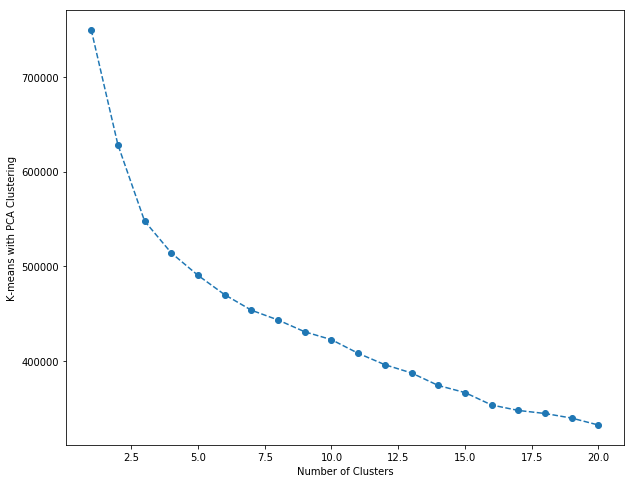

In [113]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('K-means with PCA Clustering')
plt.show()

In [114]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [115]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [117]:
df_segm_pca_kmeans = pd.concat([rawData.reset_index(drop = True), pd.DataFrame(scores_pca)],axis = 1)

In [119]:
df_segm_pca_kmeans.columns.values[-3: ]= ['Componente 1','Componente 2', 'Componente 3']

In [120]:
df_segm_pca_kmeans['Segment K-means PCA']= kmeans_pca.labels_

In [121]:
df_segm_pca_kmeans.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,16,17,18,19,20,21,Componente 1,Componente 2,Componente 3,Segment K-means PCA
0,1,20000,2,2,1,24,2,2,-1,-1,...,-0.084016,0.391568,-0.268108,-0.899970,0.614177,-0.072897,0.007900,-0.000628,0.014825,0
1,2,120000,2,2,2,26,-1,2,0,0,...,0.696935,2.105212,0.026194,-0.272829,0.854206,-0.151628,-0.004392,-0.014033,0.011099,0
2,3,90000,2,2,2,34,0,0,0,0,...,0.003519,0.025229,0.009860,-0.022393,0.027671,0.084282,-0.085955,-0.057111,-0.051692,0
3,4,50000,2,2,1,37,0,0,0,0,...,0.036966,-0.009529,0.182869,0.006355,0.019020,-0.020276,0.133266,0.001531,-0.049938,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,0.202355,0.285655,0.086832,-0.596774,0.260716,-0.061700,0.072625,-0.044428,-0.004431,0


In [128]:
df_segm_pca_kmeans['Segment']= df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first',
                                                                             1:'second',
                                                                             2:'third',
                                                                             3:'fourth'})


x_axis = df_segm_pca_kmeans['Componente 2']
y_axis = df_segm_pca_kmeans['Componente 1']
plt.figure(figsize = (10, 8))


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

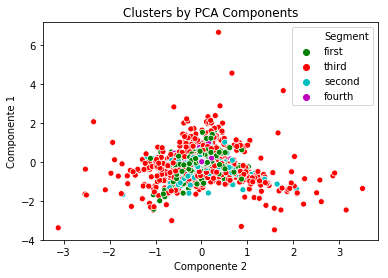

In [132]:
sns.scatterplot(x_axis, y_axis, hue =  df_segm_pca_kmeans['Segment'], palette = ['g','r', 'c', 'm'])

plt.title('Clusters by PCA Components')
plt.show()


In [133]:
X = rawData.iloc[:,6:23].values 
y = rawData.iloc[:, 11].values

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [136]:
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [137]:
 
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

In [138]:
explained_variance = pca.explained_variance_ratio_ 

In [140]:
  
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
 
y_pred = classifier.predict(X_test) 


In [142]:
 
from sklearn.metrics import confusion_matrix 
  
cm = confusion_matrix(y_test, y_pred) 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

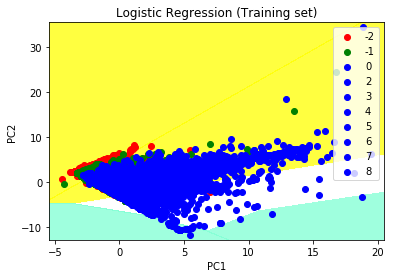

In [144]:
  
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1')  
plt.ylabel('PC2')   
plt.legend() 
  
 
plt.show() 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

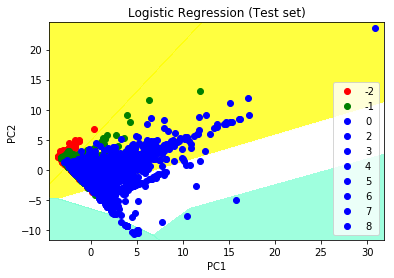

In [145]:

# Visualising the Test set results through scatter plot 
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_test, y_test 
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))  
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
# title for scatter plot 
plt.title('Logistic Regression (Test set)')  
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.legend() 
  
 
plt.show() 


In [167]:
output = 'default payment next month'


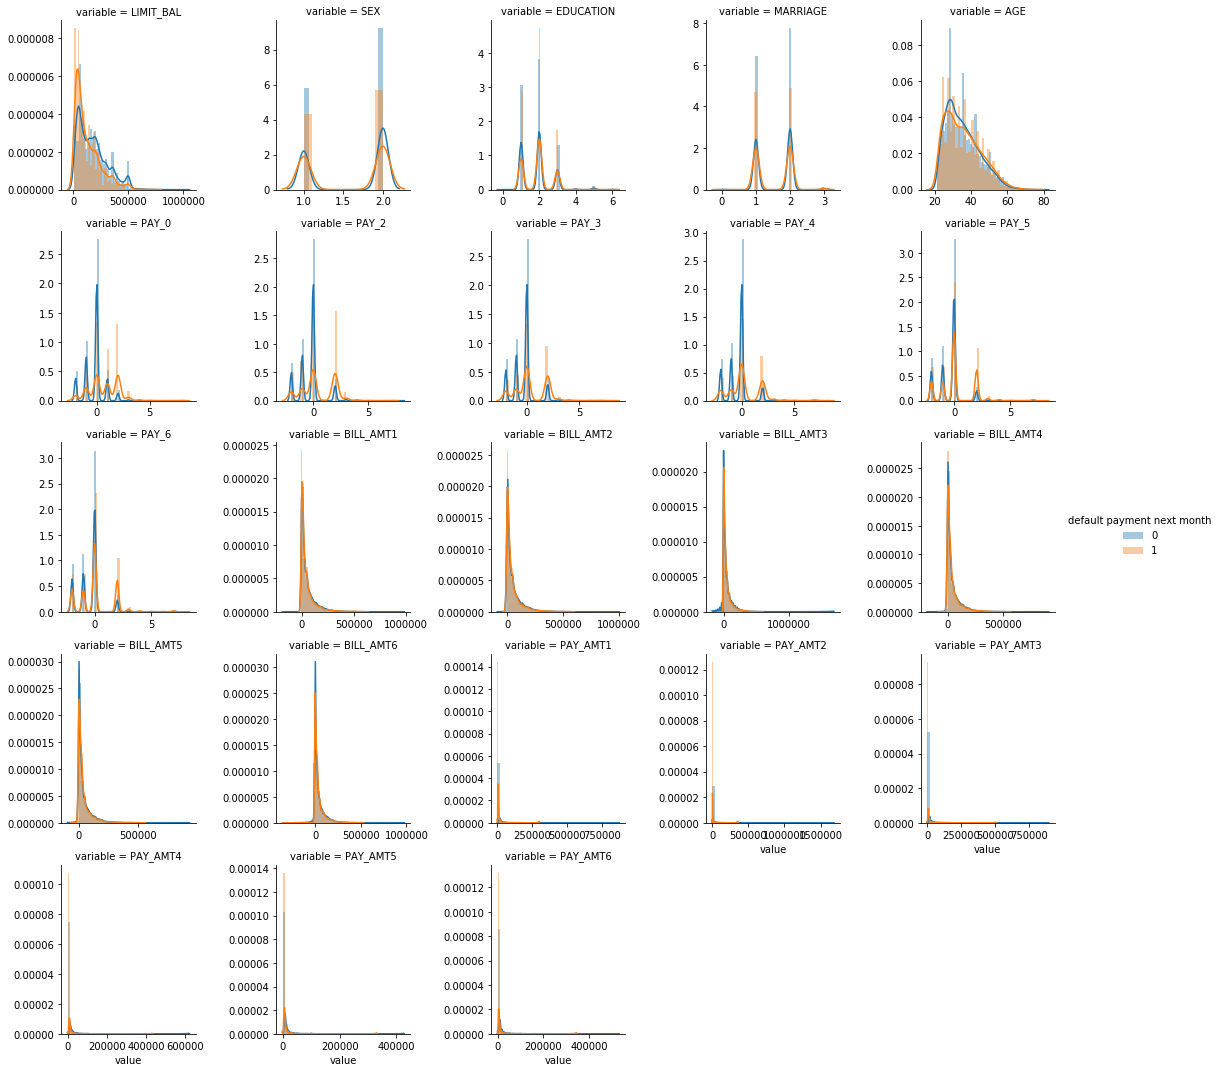

In [169]:
cols = [ f for f in rawData.columns if rawData.dtypes[ f ] != 'object']
cols.remove( 'ID')
cols.remove( output )

f = pd.melt( rawData, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

In [170]:
def ChiSquaredTestOfIndependence( df, inputVar, Outcome_Category ):
   
    Outcome_Category_Table = df.groupby( Outcome_Category )[ Outcome_Category ].count().values
    Outcome_Category_Ratios = Outcome_Category_Table / sum( Outcome_Category_Table )
    possibleVals = df[inputVar].unique()
    observed = []
    expected = []
    for possible in possibleVals:
        countsInCategories = df[ df[ inputVar ] == possible ].groupby( Outcome_Category )[Outcome_Category].count().values
        if( len(countsInCategories) != len( Outcome_Category_Ratios ) ):
            print("Error! The class " + str( possible) +" of \'" + inputVar + "\' does not contain all values of \'" + Outcome_Category + "\'" )
            return
        elif( min(countsInCategories) < 5 ):
            print("Chi Squared Test needs at least 5 observations in each cell!")
            print( inputVar + "=" + str(possible) + " has insufficient data")
            print( countsInCategories )
            return
        else:
            observed.append( countsInCategories )   
            expected.append( Outcome_Category_Ratios * len( df[df[ inputVar ] == possible ]))
    observed = np.array( observed )
    expected = np.array( expected )
    chi_squared_stat = ((observed - expected)**2 / expected).sum().sum()
    degOfF = (observed.shape[0] - 1 ) *(observed.shape[1] - 1 ) 
    #crit = stats.chi2.ppf(q = 0.95,df = degOfF) 
    p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=degOfF)
    print("Calculated test-statistic is %.2f" % chi_squared_stat )
    print("If " + Outcome_Category + " is indep of " + inputVar + ", this has prob %.2e of occurring" % p_value )
     

In [174]:
import scipy.stats as stats
ChiSquaredTestOfIndependence( rawData, 'SEX', output )

Calculated test-statistic is 47.91
If default payment next month is indep of SEX, this has prob 4.47e-12 of occurring


In [175]:

ChiSquaredTestOfIndependence( rawData, "EDUCATION", output )   

Error! The class 0 of 'EDUCATION' does not contain all values of 'default payment next month'


In [178]:
print("We have %d with EDUCATION=0" % len(rawData.loc[ rawData["EDUCATION"]==0]))
print("We have %d with EDUCATION=4" % len(rawData.loc[ rawData["EDUCATION"]==4]))
print("We have %d with EDUCATION=5" % len(rawData.loc[ rawData["EDUCATION"]==5]))
print("We have %d with EDUCATION=6" % len(rawData.loc[ rawData["EDUCATION"]==6]))

We have 14 with EDUCATION=0
We have 123 with EDUCATION=4
We have 280 with EDUCATION=5
We have 51 with EDUCATION=6


In [179]:
rawData["EDUCATION_Corr"] = rawData["EDUCATION"].apply( lambda x: x if ((x>0) and (x<4)) else 4 )
ChiSquaredTestOfIndependence( rawData, "EDUCATION_Corr", output ) 
cols.remove("EDUCATION")
cols.append("EDUCATION_Corr")

ChiSquaredTestOfIndependence( rawData, "MARRIAGE", output ) 

Calculated test-statistic is 160.41
If default payment next month is indep of EDUCATION_Corr, this has prob 0.00e+00 of occurring
Calculated test-statistic is 35.66
If default payment next month is indep of MARRIAGE, this has prob 8.83e-08 of occurring


In [180]:

quant = ["LIMIT_BAL", "AGE"]


qual_Enc = cols
qual_Enc.remove("LIMIT_BAL")
qual_Enc.remove("AGE")

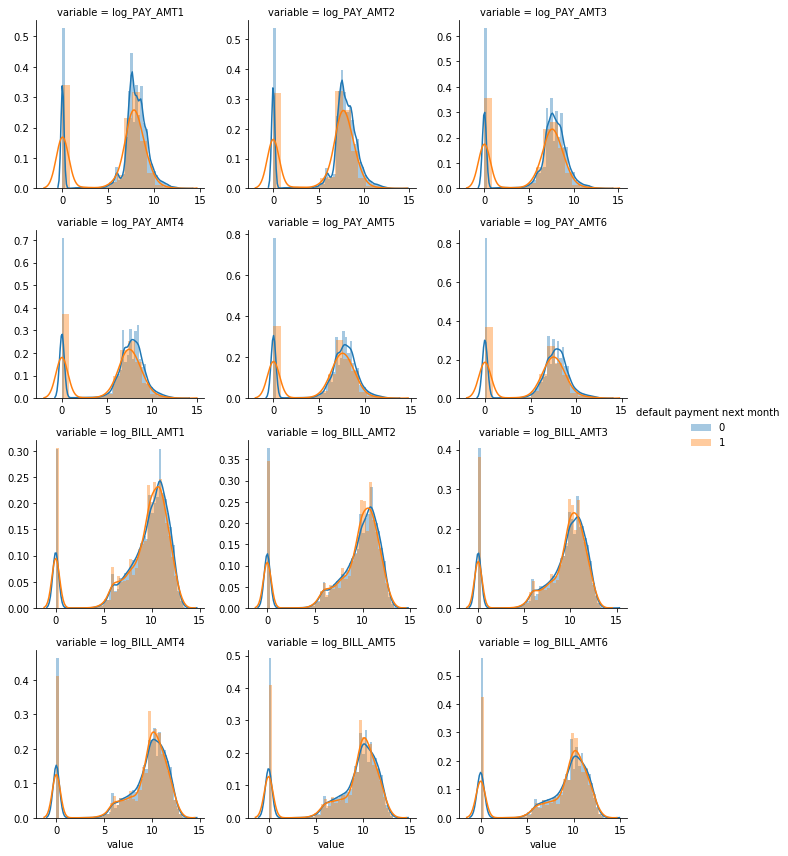

In [181]:
logged = []
for ii in range(1,7):
    qual_Enc.remove("PAY_AMT" + str( ii ))
    rawData[ "log_PAY_AMT" + str( ii )]  = rawData["PAY_AMT"  + str( ii )].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    logged.append("log_PAY_AMT" + str( ii ) )

for ii in range(1,7):
    qual_Enc.remove("BILL_AMT" + str( ii ))
    rawData[ "log_BILL_AMT" + str( ii )] = rawData["BILL_AMT" + str( ii )].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    logged.append("log_BILL_AMT" + str( ii ) )

f = pd.melt( rawData, id_vars=output, value_vars=logged)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=3, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

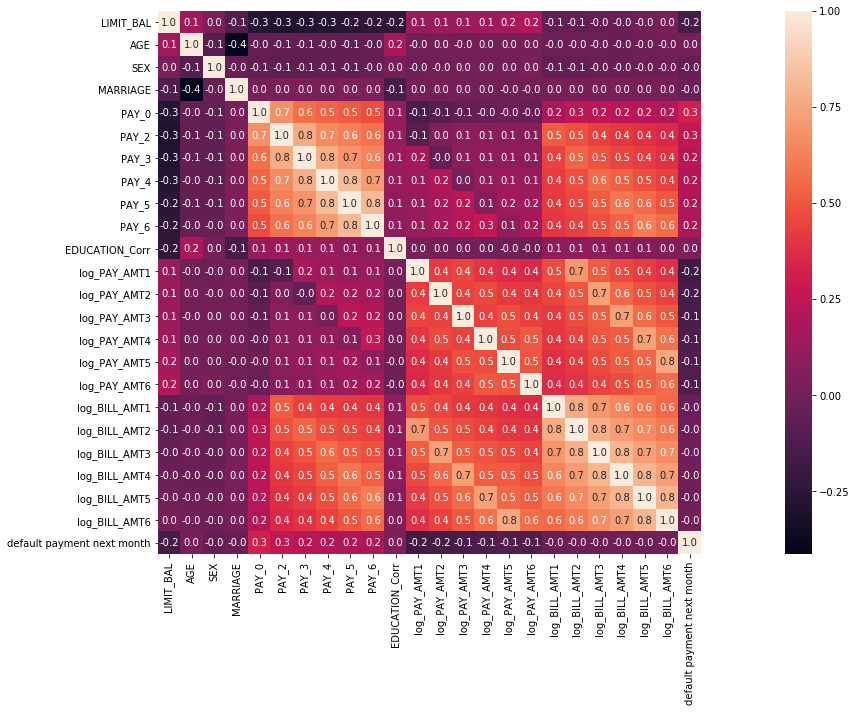

In [182]:
features = quant + qual_Enc + logged + [output]
corr = rawData[features].corr()
plt.subplots(figsize=(30,10))
sns.heatmap( corr, square=True, annot=True, fmt=".1f" )  

In [183]:
features = quant + qual_Enc + logged   
X = rawData[features].values    
y = rawData[ output ].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
X_train = scX.fit_transform( X_train )
X_test = scX.transform( X_test )



In [184]:
#-------------- 
# Random Forest 
#--------------
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit( X_train, y_train )
y_pred = classifier.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresRF = cross_val_score( classifier, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))

#-------------- 
# kernel SVM 
#--------------
from sklearn.svm import SVC
classifier1 = SVC(kernel="rbf")
classifier1.fit( X_train, y_train )
y_pred = classifier1.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresSVC = cross_val_score( classifier1, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))

Accuracy on Test Set for RandomForest = 0.80
Mean RandomForest CrossVal Accuracy on Train Set 0.81, with std=0.01
Accuracy on Test Set for kernel-SVM = 0.82
Mean kernel-SVM CrossVal Accuracy on Train Set 0.82, with std=0.00


In [185]:
#-------------- 
# Logistic Regression 
#--------------
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()
classifier2.fit( X_train, y_train )
y_pred = classifier2.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for LogReg = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresLR = cross_val_score( classifier2, X_train, y_train, cv=10)
print("Mean LogReg CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresLR.mean(), scoresLR.std() ))

#-------------- 
# Naive Bayes 
#--------------
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit( X_train, y_train )
y_pred = classifier3.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for NBClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresNB = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean NaiveBayes CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresNB.mean(), scoresNB.std() ))

#-------------- 
# K-NEIGHBOURS 
#--------------
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors=5)
classifier4.fit( X_train, y_train )
y_pred = classifier4.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for KNeighborsClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresKN = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean KN CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))

Accuracy on Test Set for LogReg = 0.81
Mean LogReg CrossVal Accuracy on Train Set 0.81, with std=0.00
Accuracy on Test Set for NBClassifier = 0.76
Mean NaiveBayes CrossVal Accuracy on Train Set 0.76, with std=0.01
Accuracy on Test Set for KNeighborsClassifier = 0.79
Mean KN CrossVal Accuracy on Train Set Set 0.76, with std=0.01
